# Best Position vs Agility ANOVA

Here, I will analyse the agility by best position. In order to perform ANOVA, there are three assumptions that need to be fulfilled, namely, normality, homegeneity of variance, and independence. Independence is satisfied intuitively.

In [1]:
library("repr")
library("ggplot2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
players = read.csv("MH3511_project/fifa23_players_data.csv")
head(players)

Known.As,Full.Name,Overall,Potential,Value.in.Euro.,Positions.Played,Best.Position,Nationality,Image.Link,Age,...,LM.Rating,CM.Rating,RM.Rating,LWB.Rating,CDM.Rating,RWB.Rating,LB.Rating,CB.Rating,RB.Rating,GK.Rating
L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
K. MbappÃ©,Kylian MbappÃ©,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25


In [3]:
colnames(players)

[1] "Known.As"                    "Full.Name"                  
 [3] "Overall"                     "Potential"                  
 [5] "Value.in.Euro."              "Positions.Played"           
 [7] "Best.Position"               "Nationality"                
 [9] "Image.Link"                  "Age"                        
[11] "Height.in.cm."               "Weight.in.kg."              
[13] "TotalStats"                  "BaseStats"                  
[15] "Club.Name"                   "Wage.in.Euro."              
[17] "Release.Clause"              "Club.Position"              
[19] "Contract.Until"              "Club.Jersey.Number"         
[21] "Joined.On"                   "On.Loan"                    
[23] "Preferred.Foot"              "Weak.Foot.Rating"           
[25] "Skill.Moves"                 "International.Reputation"   
[27] "National.Team.Name"          "National.Team.Image.Link"   
[29] "National.Team.Position"      "National.Team.Jersey.Number"
[31] "Attacking.Work.Rate"         "Defensive.Work.Rate"        
[33] "Pace.Total"                  "Shooting.Total"             
[35] "Passing.Total"               "Dribbling.Total"            
[37] "Defending.Total"             "Physicality.Total"          
[39] "Crossing"                    "Finishing"                  
[41] "Heading.Accuracy"            "Short.Passing"              
[43] "Volleys"                     "Dribbling"                  
[45] "Curve"                       "Freekick.Accuracy"          
[47] "LongPassing"                 "BallControl"                
[49] "Acceleration"                "Sprint.Speed"               
[51] "Agility"                     "Reactions"                  
[53] "Balance"                     "Shot.Power"                 
[55] "Jumping"                     "Stamina"                    
[57] "Strength"                    "Long.Shots"                 
[59] "Aggression"                  "Interceptions"              
[61] "Positioning"                 "Vision"                     
[63] "Penalties"                   "Composure"                  
[65] "Marking"                     "Standing.Tackle"            
[67] "Sliding.Tackle"              "Goalkeeper.Diving"          
[69] "Goalkeeper.Handling"         "GoalkeeperKicking"          
[71] "Goalkeeper.Positioning"      "Goalkeeper.Reflexes"        
[73] "ST.Rating"                   "LW.Rating"                  
[75] "LF.Rating"                   "CF.Rating"                  
[77] "RF.Rating"                   "RW.Rating"                  
[79] "CAM.Rating"                  "LM.Rating"                  
[81] "CM.Rating"                   "RM.Rating"                  
[83] "LWB.Rating"                  "CDM.Rating"                 
[85] "RWB.Rating"                  "LB.Rating"                  
[87] "CB.Rating"                   "RB.Rating"                  
[89] "GK.Rating"

## Agility by Best Position

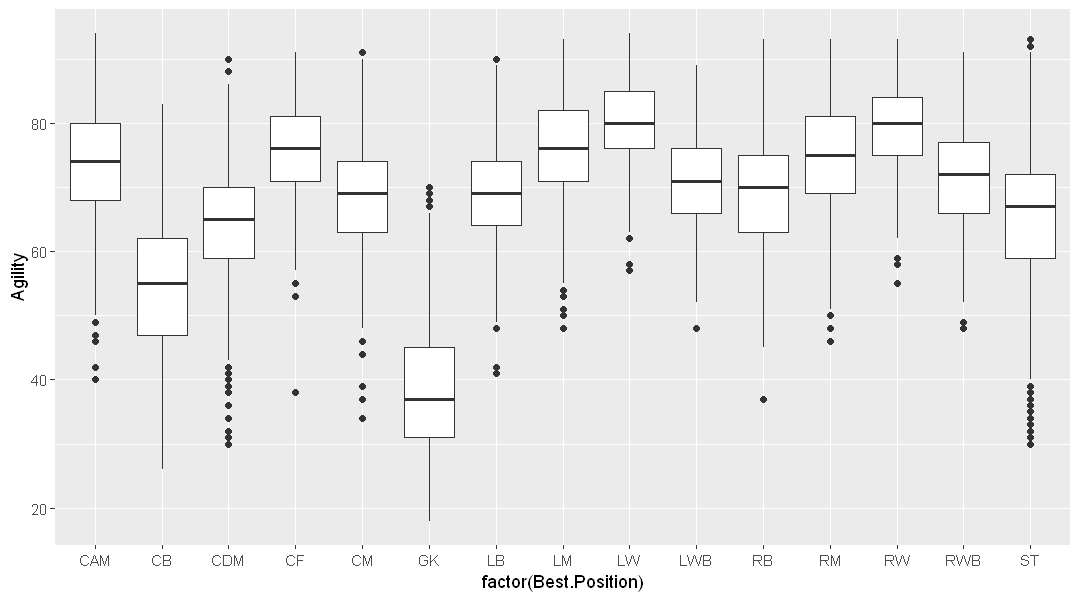

In [4]:
options(repr.plot.width=9, repr.plot.height=5)
df = players[,c('Best.Position', 'Agility')]
ggplot(df,  aes(x=factor(Best.Position), y=Agility)) + geom_boxplot() 

### All Positions

In [5]:
df1 = players[,c('Best.Position', 'Agility')]
group = levels(df1$Best.Position)
head(df1)

Best.Position,Agility
CAM,91
CF,78
ST,77
CM,76
ST,93
RW,90


### Normality Assumption Check

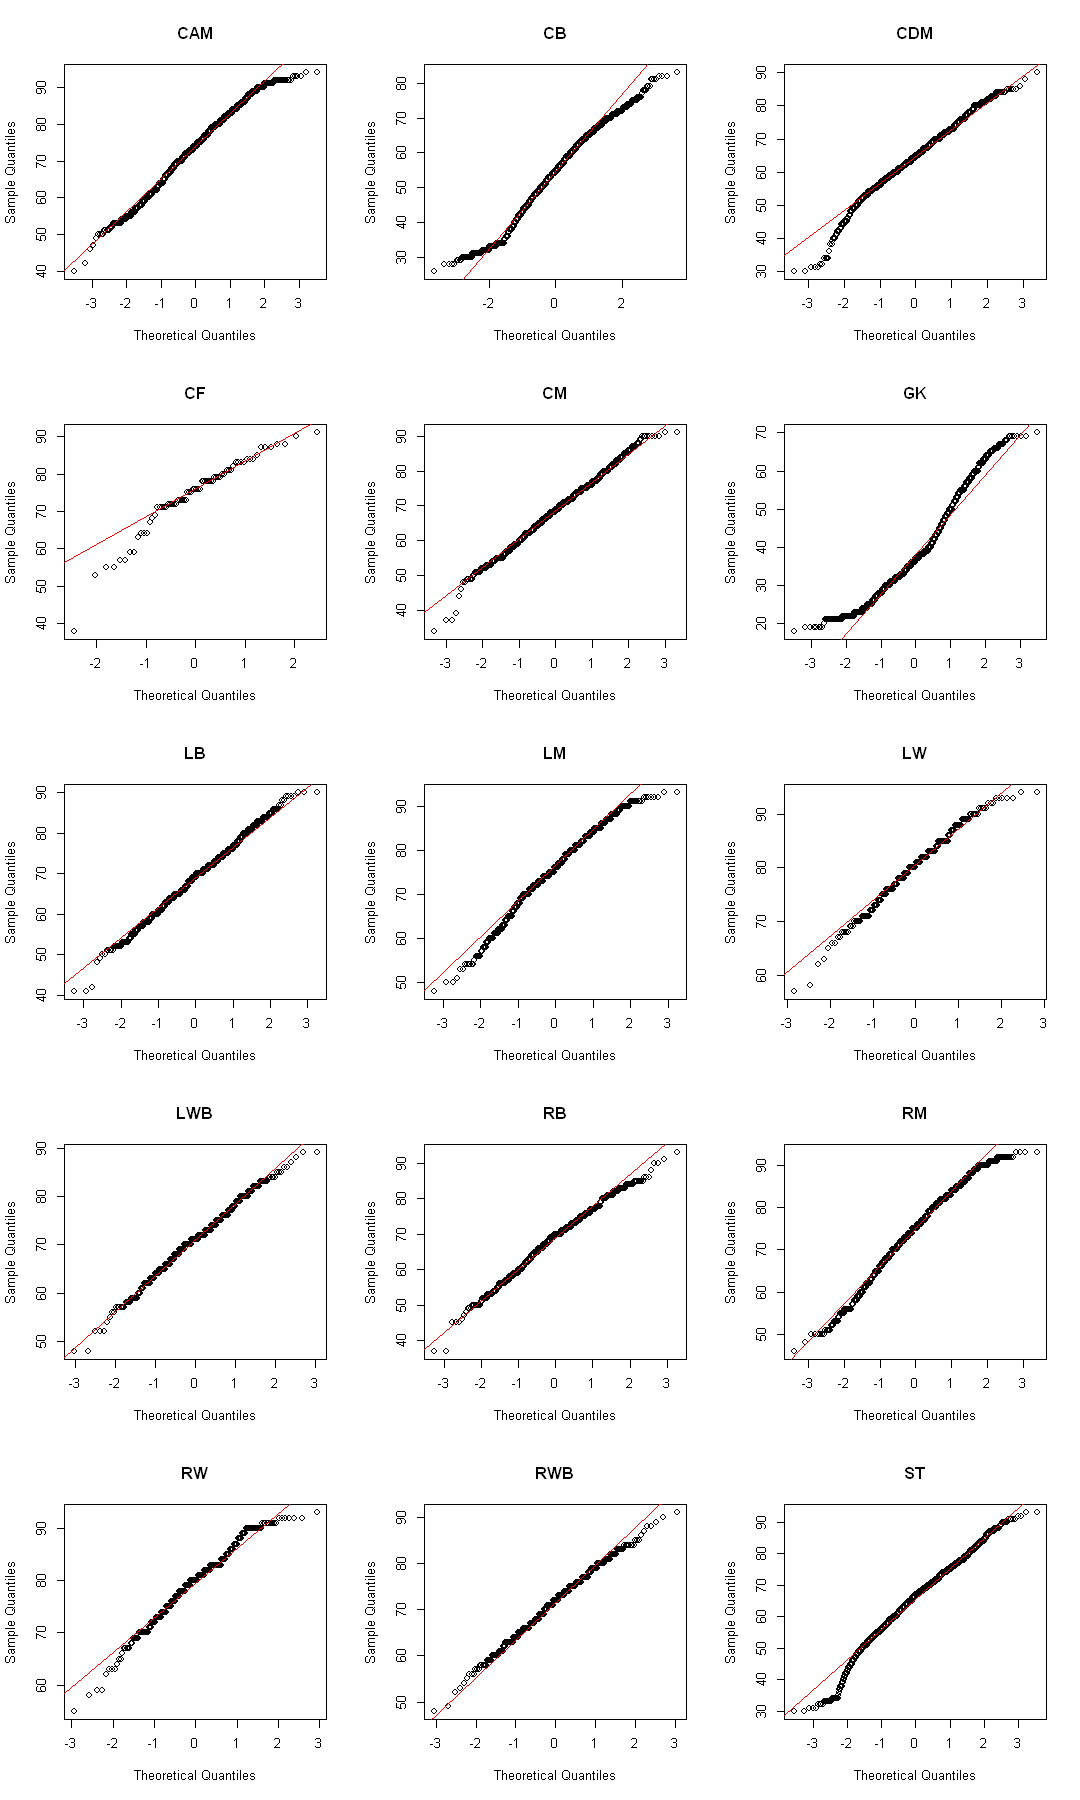

In [6]:
options(repr.plot.width=9, repr.plot.height=15)
par(mfrow=c(5,3))
for (pos in group){
    qqnorm(df1[df1['Best.Position'] == pos, 'Agility'], main=pos)
    qqline(df1[df1['Best.Position'] == pos, 'Agility'], col='red')
}

The Q-Q plot shows a largely straight-line pattern if it is from a normal distribution. From the above figure, not all Q-Q plots are in a straight-line. Let's do Shapiro-Wilk test to get more conclusive evidence.

In [7]:
pvalue = vector()
length = vector()
for (pos in group){
    x = df1[df1['Best.Position'] == pos, 'Agility']
    pvalue = append(pvalue, round(shapiro.test(x)[[2]], 3))
    length = append(length, length(x))
}
normaldf = data.frame(group, length, pvalue)
normaldf[normaldf['pvalue'] <= 0.05,]

,group,length,pvalue
1,CAM,2311,0.000
2,CB,3658,0.000
3,CDM,1403,0.000
4,CF,70,0.001
5,CM,1104,0.001
6,GK,2061,0.000
7,LB,864,0.019
8,LM,797,0.000
9,LW,215,0.017
11,RB,925,0.000


At 5% significance level, none of the groups come from a normal distribution. However, as each sample size is larger than 30, by using Central Limit Theorem, we can approximate each distribution to be normal. Hence, the normality assumption is satisfied for large sample size.

### Homogeneity of Variance Assumption Check

In [8]:
groupC <- combn(group, 2, simplify=FALSE)

In [9]:
pvalue = vector()
pair = vector()
for (i in groupC){
    pos = unlist(i)
    x = df1[df1['Best.Position'] == pos[1], 'Agility']
    y = df1[df1['Best.Position'] == pos[2], 'Agility']
    pair = append(pair, paste(pos[1], pos[2]))
    pvalue = append(pvalue, round(var.test(x, y)[[3]], 3))
}
variancedf = data.frame(pair, pvalue)
# Select combinations which have the same variance
variancedf[variancedf['pvalue'] > 0.05,]

,pair,pvalue
2,CAM CDM,0.576
3,CAM CF,0.289
11,CAM RM,0.237
16,CB CF,0.477
18,CB GK,0.954
28,CDM CF,0.226
29,CDM CM,0.086
36,CDM RM,0.578
40,CF CM,0.071
41,CF GK,0.472


Based on the results, we will only consider LW, RW, LWB, and RWB for ANOVA as their combinations fulfill all assumptions.

In [10]:
group <- c('LW', 'RW', 'LWB', 'RWB')
df1 = players[(players['Best.Position'] == 'LWB') |
              (players['Best.Position'] == 'RWB') |
              (players['Best.Position'] == 'LW') |
              (players['Best.Position'] == 'RW'),
               c('Best.Position', 'Agility')]
df1 = droplevels(df1) # To change to new levels
head(df1)

,Best.Position,Agility
6,RW,90
12,LW,93
13,LW,85
48,LW,94
49,RW,92
64,LW,94


### ANOVA Test

In [11]:
n = nrow(df1); k = length(group)
Sw2 = 0; Sb2 = 0
Xbar = mean(df1$Agility)
for (pos in group){
    Xi = df1[df1['Best.Position'] == pos, 'Agility']
    Sw2 = Sw2 + sum((Xi - mean(Xi))^2)
    Sb2 = Sb2 + length(Xi)*((mean(Xi) - Xbar)^2)
}
Sw2 = Sw2/(n-k)
Sb2 = Sb2/(k-1)
F = Sb2/Sw2
Sw2;Sb2;F

[1] 53.23363

[1] 7726.94

[1] 145.1515

In [12]:
# sum of squares
Sb2*(k-1)
# residuals
Sw2*(n-k)

[1] 23180.82

[1] 71013.67

In [13]:
1-pf(F, df1=k-1, df2=n-k)

[1] 0

At 5% significance level, there is sufficient evidence to reject the null hypothesis that their means are equal.

In [14]:
aov(df1$Agility ~ factor(df1$Best.Position))

Call:
   aov(formula = df1$Agility ~ factor(df1$Best.Position))

Terms:
                factor(df1$Best.Position) Residuals
Sum of Squares                   23180.82  71013.67
Deg. of Freedom                         3      1334

Residual standard error: 7.296138
Estimated effects may be unbalanced

In [15]:
summary(aov(df1$Agility ~ factor(df1$Best.Position)))

                            Df Sum Sq Mean Sq F value Pr(>F)    
factor(df1$Best.Position)    3  23181    7727   145.2 <2e-16 ***
Residuals                 1334  71014      53                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

At 5% significance level, LWB, RWB, LW, and RW may have equal means.

Let's compare the mean of each pair.

### Pairwise comparisons

In [16]:
pairwise.t.test(df1$Agility, df1$Best.Position, p.adjust.method = 'none')


	Pairwise comparisons using t tests with pooled SD 

data:  df1$Agility and df1$Best.Position 

    LW     LWB    RW    
LWB <2e-16 -      -     
RW  0.39   <2e-16 -     
RWB <2e-16 0.21   <2e-16

P value adjustment method: none 

At 5% significance level, all combinations have unequal means while LW vs RW and LWB vs RWB have equal means.